# MBAPPE VS HAALAND

Football World cup 2022 is knocking on the door. It is the best time to dive into football data and draws some interesting insights. I was excited to see the dataset since I was interested in comparing players based on their attributes. The main scope of the project is to compare Mbappe and Haaland and check who is the better player at the moment. Besides, we will also dissect the whole dataset to look at players' age and try to draw some individual and team-level insights. Money is always a hot topic when we look at the football world. Transfer markets are sometimes crazier than many of the matches. Hence, as a part of the analysis, we will find out who is the most valued player, who is the highest paid player, and also, who has the highest release clause. All are coming up in the report. So, let's roll our sleeves and load the CSV files..........

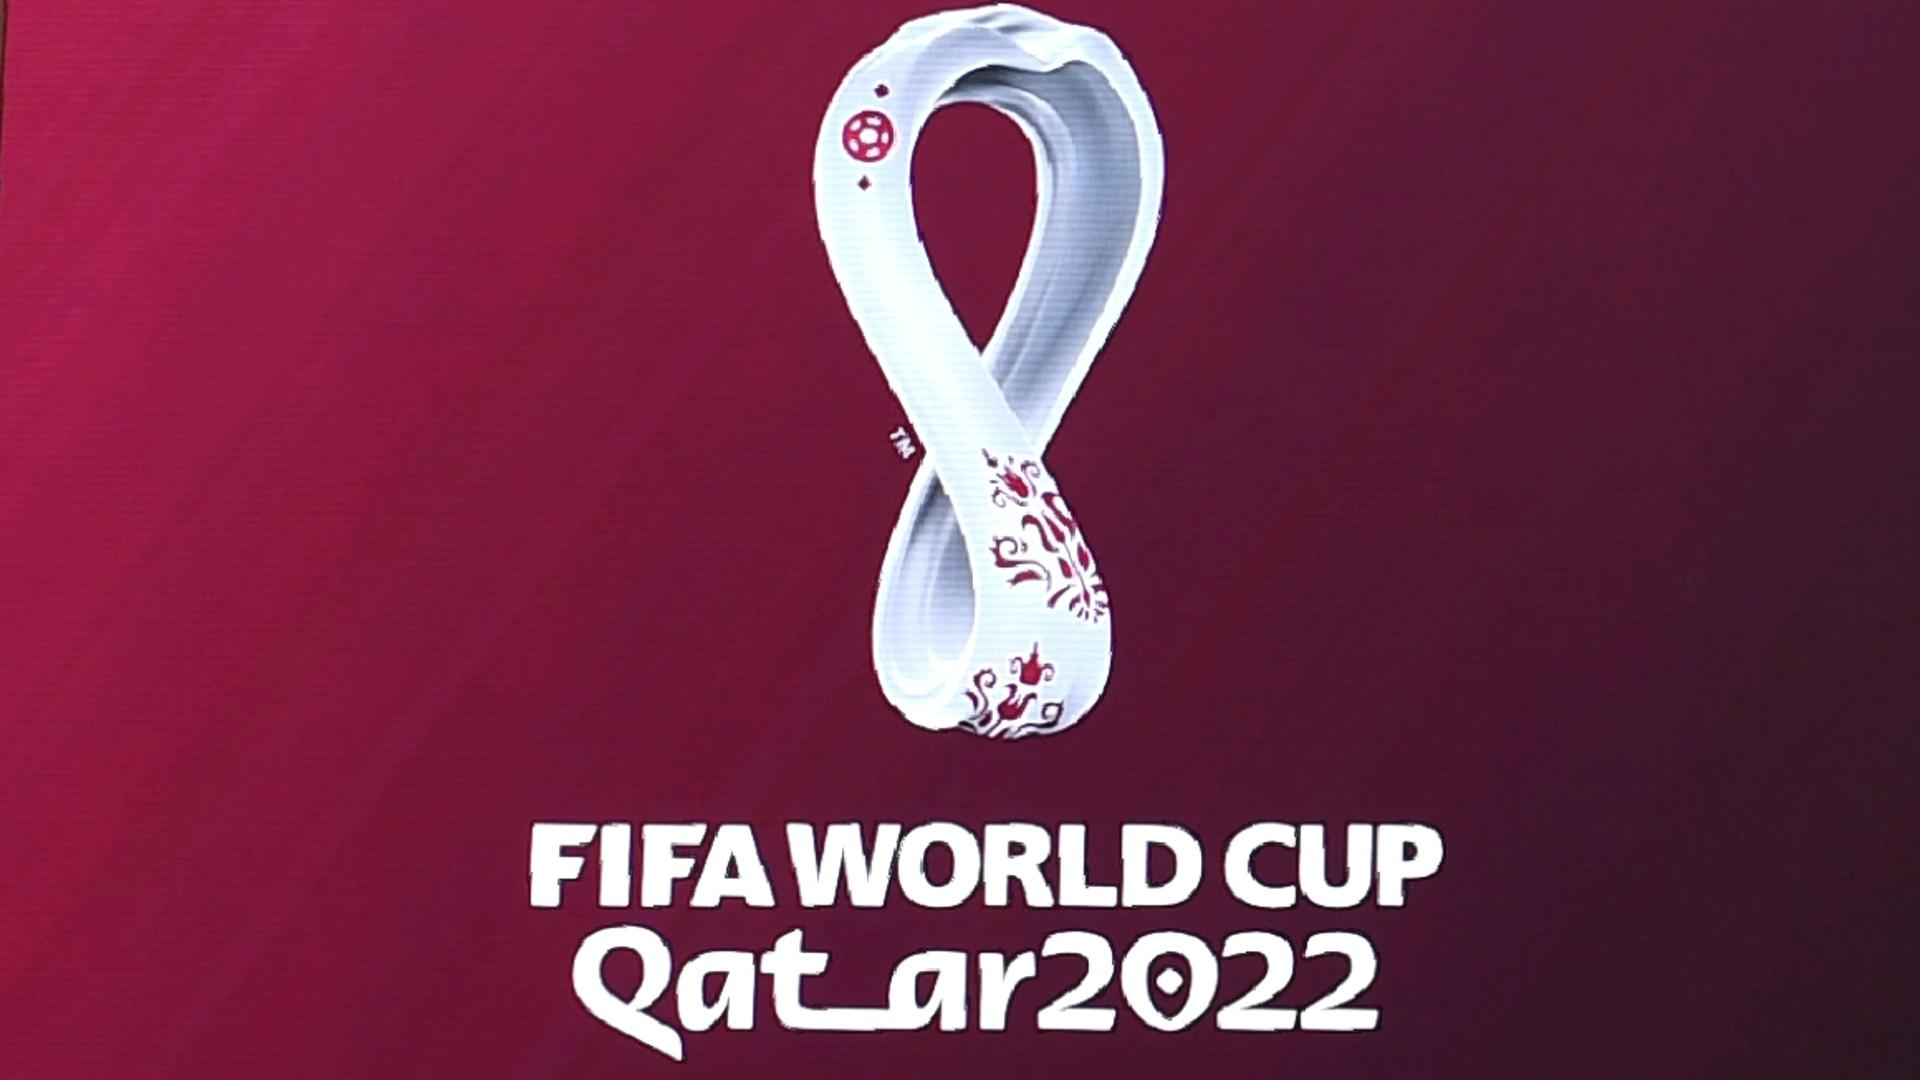

source: @ sporting news



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing CSV files

In [2]:
fifa = pd.read_csv("players_fifa23.csv")
club = pd.read_csv("teams_fifa23.csv")

# Exploring Datasets

## Players_fifa23

In [3]:
fifa.shape

(18539, 90)

In [4]:
fifa.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

- Since there are 90 columns which could be tough to digest in one go, we will use slicing at regular interval and conduct our analysis

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   FullName           18539 non-null  object 
 3   Age                18539 non-null  int64  
 4   Height             18539 non-null  int64  
 5   Weight             18539 non-null  int64  
 6   PhotoUrl           18539 non-null  object 
 7   Nationality        18539 non-null  object 
 8   Overall            18539 non-null  int64  
 9   Potential          18539 non-null  int64  
 10  Growth             18539 non-null  int64  
 11  TotalStats         18539 non-null  int64  
 12  BaseStats          18539 non-null  int64  
 13  Positions          18539 non-null  object 
 14  BestPosition       18539 non-null  object 
 15  Club               18539 non-null  object 
 16  ValueEUR           185

In [6]:
# Extracting column list with "object" datatype
for col in fifa:
    if fifa[col].dtype == "object":
        print(col)

Name
FullName
PhotoUrl
Nationality
Positions
BestPosition
Club
ClubPosition
NationalTeam
NationalPosition
PreferredFoot
AttackingWorkRate
DefensiveWorkRate


- Most of the columns contain numberical values. While above code line indicates all the columns with "object" data type 

In [7]:
fifa[["Age","Height", "Weight", "Overall", "Potential"]].describe()

,Age,Height,Weight,Overall,Potential
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,25.240412,181.550839,75.173904,65.852042,71.016668
std,4.718163,6.858097,7.013593,6.788353,6.192866
min,16.000000,155.000000,49.000000,47.000000,48.000000
25%,21.000000,177.000000,70.000000,62.000000,67.000000
50%,25.000000,182.000000,75.000000,66.000000,71.000000
75%,29.000000,186.000000,80.000000,70.000000,75.000000
max,44.000000,206.000000,105.000000,91.000000,95.000000


## Duplicate values

In [8]:
fifa = fifa.drop_duplicates(subset = "FullName")
fifa

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,243725,D. Collins,Darren Collins,21,174,68,https://cdn.sofifa.net/players/243/725/23_60.png,Republic of Ireland,47,56,...,50,44,50,41,38,41,40,36,40,15
18535,261933,Yang Dejiang,Dejiang Yang,17,175,60,https://cdn.sofifa.net/players/261/933/23_60.png,China PR,47,57,...,45,45,45,47,48,47,49,49,49,15
18536,267823,L. Mullan,Liam Mullan,18,170,65,https://cdn.sofifa.net/players/267/823/23_60.png,Northern Ireland,47,67,...,52,49,52,46,44,46,46,42,46,17
18537,267824,D. McCallion,Daithí McCallion,17,178,65,https://cdn.sofifa.net/players/267/824/23_60.png,Republic of Ireland,47,61,...,33,33,33,44,42,44,47,49,47,15


# Missing values

In [9]:
from IPython.display import display
with pd.option_context("display.max_row", 100):
    display(fifa.isna().any())

ID                   False
Name                 False
FullName             False
Age                  False
Height               False
Weight               False
PhotoUrl             False
Nationality          False
Overall              False
Potential            False
Growth               False
TotalStats           False
BaseStats            False
Positions            False
BestPosition         False
Club                 False
ValueEUR             False
WageEUR              False
ReleaseClause        False
ClubPosition          True
ContractUntil         True
ClubNumber            True
ClubJoined           False
OnLoad               False
NationalTeam         False
NationalPosition      True
NationalNumber        True
PreferredFoot        False
IntReputation        False
WeakFoot             False
SkillMoves           False
AttackingWorkRate    False
DefensiveWorkRate    False
PaceTotal            False
ShootingTotal        False
PassingTotal         False
DribblingTotal       False
D

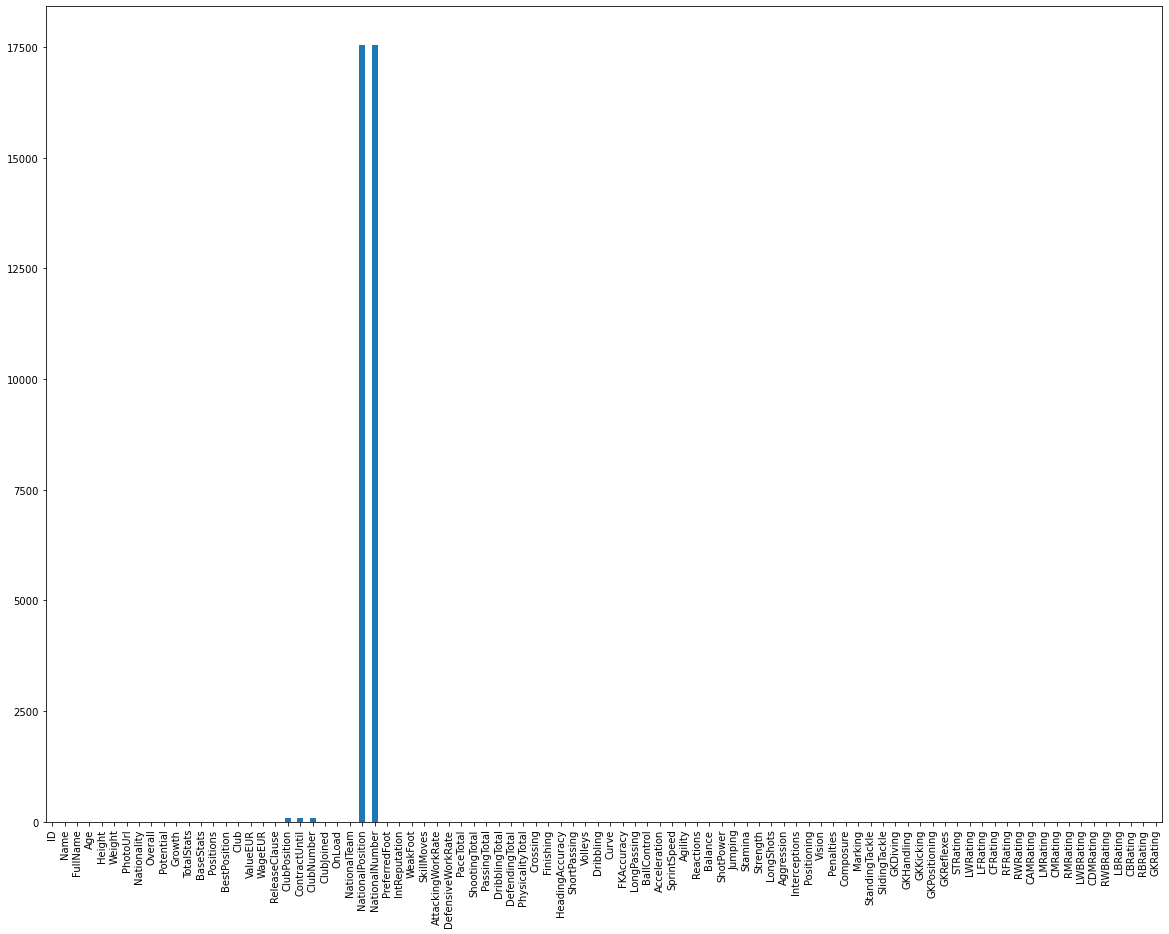

In [10]:
# Analysing how many values are missing in the dataset
plt.figure(figsize = (20, 15))
fifa.isna().sum().plot(kind = "bar");

- As we can see, there are 5 columns (club position, contract until, club number, national positions and national number) with missing values. 
- It can also be observed that, "NationalPosition" and "NationalNumber" columns contain only 817 entries. Entries from many players appeared to be missing here. 
- Since the columns with missing values are out of scope for this project, they are not taken into consideration.

# Exploratory Data Analysis

## Analysing players based on age

In [11]:
# Slicing columns name, age, natinality, club, value and wage

players_value = fifa[['FullName','Age','Nationality', 'Overall', 'Potential','Club', 
                      'ValueEUR','ReleaseClause','WageEUR', 'NationalTeam']]
players_value

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
0,Lionel Messi,35,Argentina,91,91,Paris Saint-Germain,54000000,99900000,195000,Argentina
1,Karim Benzema,34,France,91,91,Real Madrid CF,64000000,131199999,450000,France
2,Robert Lewandowski,33,Poland,91,91,FC Barcelona,84000000,172200000,420000,Poland
3,Kevin De Bruyne,31,Belgium,91,91,Manchester City,107500000,198900000,350000,Belgium
4,Kylian Mbappé,23,France,91,95,Paris Saint-Germain,190500000,366700000,230000,France
...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,21,Republic of Ireland,47,56,Sligo Rovers,110000,193000,500,Not in team
18535,Dejiang Yang,17,China PR,47,57,Guangzhou FC,90000,158000,500,Not in team
18536,Liam Mullan,18,Northern Ireland,47,67,Derry City,130000,332000,500,Not in team
18537,Daithí McCallion,17,Republic of Ireland,47,61,Derry City,100000,218000,500,Not in team


In [12]:
# Player with maximum and minimum age

players_value.Age.max()

44

In [13]:
players_value[players_value["Age"] == 44]

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
592,Gianluigi Buffon,44,Italy,79,79,Parma,1900000,3000000,3000,Not in team


- World cup winner Buffon is regarded as one of the best Goalkeepers in the world. He conceded only two goals in the World cup 2006. He got nominated 9 times for Ballon d’Or. Currently playing at 44 years of age makes Buffon the eldest player in Fifa.

In [14]:
players_value.Age.min()

16

In [15]:
players_value[players_value["Age"] == 16]

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
11481,Obed Vargas,16,United States,64,81,Seattle Sounders FC,1500000,3200000,500,Not in team
14439,Wisdom Amey,16,Italy,61,81,Bologna,850000,2300000,500,Not in team
14547,Elione Fernandes Neto,16,Portugal,61,73,Fortuna Düsseldorf,700000,1300000,500,Not in team
14747,Aylan Benyahia-Tani,16,France,61,77,Olympique de Marseille,825000,2100000,1000,Not in team
15418,Roman Fernández,16,Argentina,60,74,Racing Club,550000,1200000,650,Not in team
16084,Serge Ngoma,16,United States,58,82,New York Red Bulls,650000,1600000,500,Not in team
16329,Nils Rossen,16,Netherlands,58,74,N.E.C. Nijmegen,500000,1100000,500,Not in team
16707,Efe-Kaan Sihlaroglu,16,Germany,57,77,Karlsruher SC,450000,1200000,500,Not in team
16813,Omar Megeed,16,Egypt,57,77,Hamburger SV,450000,1200000,500,Not in team
16815,Kevin Wiethaup,16,Germany,57,71,VfL Osnabrück,375000,778000,500,Not in team


In [16]:
players_value[players_value["Age"] == 16].shape

(31, 10)

- There are 31 players registered in Fifa who are palying at age of 16 for club but all of them are yet to selected in national team

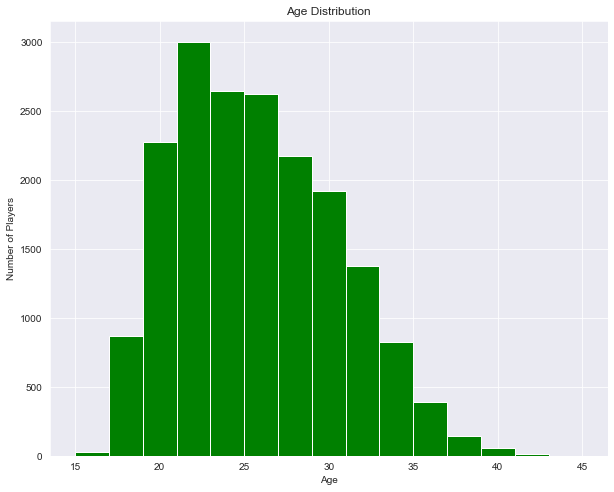

In [17]:
# let see the age distibution graph for fifa23
sns.set_style("darkgrid")
plt.figure(figsize =(10, 8))
plt.hist(players_value.Age, bins = np.arange(15, 46, 2), color = "g")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Players");

- From the histogram, we can see that FIFA included a majority of players between the age group 19 to 33 years. There are more than 3000 players in the age group 21 - 23 years which constitutes the highest bins in the age distribution graph. It was expected as players are young and fit and on a journey of building their careers during this age group

- Let's try to check the correlation between players' age and overall rating. The hypothesis is that player learns and grows with experience so, these two parameters might be positively correlated with each other. Let's find out if this is the case.

/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


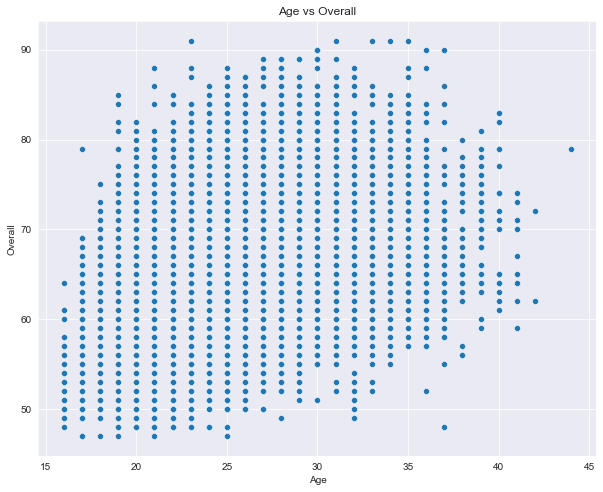

In [18]:
plt.figure(figsize = (10, 8))
sns.scatterplot(players_value.Age, players_value.Overall)
plt.title("Age vs Overall")
plt.xlabel("Age")
plt.ylabel("Overall");

In [19]:
players_value["Age"].corr(players_value["Overall"])

0.44674708656940737

- Our hypothesis is not completely wrong. However, the correlation is moderate. Players show higher overall ratings than many players despite being younger than them and it holds for the elder players as well. Surely, natural talent plays a role in players' development. Looking at Haaland and Mbappe, we need not ask for proof.
- Nonetheless, I am also interested in finding out the young talents i.e. of young players with higher overall ratings. Let's set the age limit as less than or equal to 22 years and the overall rating limit as greater than or equal to 85
- Let's keep an eye on their overall and potential ratings 

In [20]:
# filtering players with age less than or equal to 22 years

players_value_22 = players_value[np.logical_and(players_value["Age"] <= 22, players_value["Overall"]>= 85)]
players_value_22

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
21,Erling Haaland,21,Norway,88,94,Manchester City,148000000,303400000,220000,Norway
63,Vinícius José de Oliveira Júnior,21,Brazil,86,92,Real Madrid CF,109000000,245300000,200000,Not in team
82,Pedro González López,19,Spain,85,93,FC Barcelona,116000000,261000000,115000,Spain
83,Phil Foden,22,England,85,92,Manchester City,109500000,224500000,180000,England
84,Matthijs de Ligt,22,Netherlands,85,89,FC Bayern München,71000000,122500000,77000,Netherlands


- These are not stranger names to us. I have heard and seen much about Haaland, Vinicius, Foden, and de Ligt, but looking at Pedri's stats, I am now certainly gonna follow him. Where is Mbappe, you asked. He turned 23 hence not on the list! 
- I am quite surprised after seeing that Vinicius is not included in the national team. Looks like, there is an error! 

## Average age of national teams and clubs

In [21]:
players_value

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
0,Lionel Messi,35,Argentina,91,91,Paris Saint-Germain,54000000,99900000,195000,Argentina
1,Karim Benzema,34,France,91,91,Real Madrid CF,64000000,131199999,450000,France
2,Robert Lewandowski,33,Poland,91,91,FC Barcelona,84000000,172200000,420000,Poland
3,Kevin De Bruyne,31,Belgium,91,91,Manchester City,107500000,198900000,350000,Belgium
4,Kylian Mbappé,23,France,91,95,Paris Saint-Germain,190500000,366700000,230000,France
...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,21,Republic of Ireland,47,56,Sligo Rovers,110000,193000,500,Not in team
18535,Dejiang Yang,17,China PR,47,57,Guangzhou FC,90000,158000,500,Not in team
18536,Liam Mullan,18,Northern Ireland,47,67,Derry City,130000,332000,500,Not in team
18537,Daithí McCallion,17,Republic of Ireland,47,61,Derry City,100000,218000,500,Not in team


In [22]:
countries_age = players_value.groupby("NationalTeam")["Age"].mean()
countries_age

NationalTeam
Argentina              28.043478
Australia              27.545455
Austria                27.272727
Belgium                29.521739
Brazil                 26.173913
Canada                 27.173913
China PR               29.347826
Croatia                27.217391
Czech Republic         26.913043
Denmark                27.142857
England                25.739130
Finland                26.739130
France                 27.086957
Germany                27.130435
Ghana                  26.304348
Hungary                27.304348
Iceland                25.869565
Italy                  27.695652
Mexico                 28.272727
Morocco                26.695652
Netherlands            26.695652
New Zealand            26.173913
Northern Ireland       28.363636
Norway                 25.619048
Not in team            25.167598
Poland                 27.000000
Portugal               27.956522
Qatar                  27.173913
Republic of Ireland    26.347826
Romania                26.6086

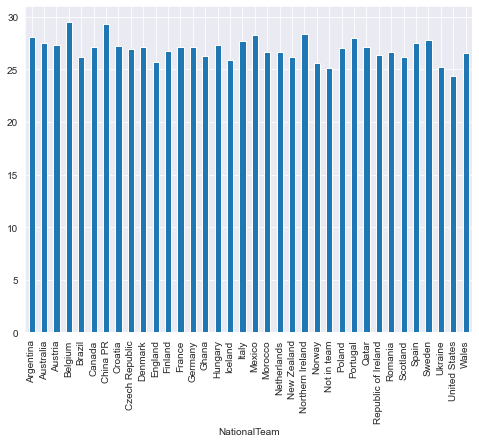

In [23]:
plt.figure(figsize = (8,6))
countries_age.plot(kind = "bar");

- They say age is just a number! For the sake of analyzing, we figured out the United States will be battling in the world cup with the yougest squad. The average age of their team is 24 years. Whereas, Belgium is ready to battle with the eldest squad compared to their counterparts. We have to keep in mind that it is not the average of the squad's age but the average of all the players representing the national team. 

In [24]:
# lets focus on top teams i.e teams with overall rating greater than or equal to 80

club_top = club[club["Overall"] >= 80]
club_top

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
2,1,Arsenal,English Premier League (1),13,80,83,81,79,0,7,7,29,24.1,23.0
6,5,Chelsea,English Premier League (1),13,84,84,86,84,0,9,8,31,28.1,24.8
12,9,Liverpool,English Premier League (1),13,85,84,82,87,0,9,9,30,26.9,25.7
13,10,Manchester City,English Premier League (1),13,85,86,86,86,0,10,10,27,27.2,25.4
14,11,Manchester United,English Premier League (1),13,82,85,83,80,0,8,8,33,25.4,25.2
18,18,Tottenham Hotspur,English Premier League (1),13,81,84,81,79,0,8,7,29,26.4,25.0
19,19,West Ham United,English Premier League (1),13,80,79,80,78,0,6,5,29,28.1,26.0
34,73,Paris Saint-Germain,French Ligue 1 (1),16,85,88,82,83,0,10,9,26,27.2,25.8
44,32,Bayer 04 Leverkusen,German 1. Bundesliga (1),19,80,85,79,80,0,8,6,29,24.8,23.9
45,22,Borussia Dortmund,German 1. Bundesliga (1),19,81,79,80,82,0,9,7,33,26.4,23.9


In [25]:
club_top.sort_values("StartingAverageAge")

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
2,1,Arsenal,English Premier League (1),13,80,83,81,79,0,7,7,29,24.1,23.0
44,32,Bayer 04 Leverkusen,German 1. Bundesliga (1),19,80,85,79,80,0,8,6,29,24.8,23.9
59,47,AC Milan,Italian Serie A (1),31,81,81,81,81,0,9,7,31,25.3,25.7
14,11,Manchester United,English Premier League (1),13,82,85,83,80,0,8,8,33,25.4,25.2
84,241,FC Barcelona,Spain Primera Division (1),53,84,84,85,82,0,10,10,33,25.8,24.0
52,112172,RB Leipzig,German 1. Bundesliga (1),19,81,82,81,80,0,8,7,24,26.0,25.1
18,18,Tottenham Hotspur,English Premier League (1),13,81,84,81,79,0,8,7,29,26.4,25.0
45,22,Borussia Dortmund,German 1. Bundesliga (1),19,81,79,80,82,0,9,7,33,26.4,23.9
49,21,FC Bayern München,German 1. Bundesliga (1),19,84,89,85,82,0,10,10,23,26.9,25.8
12,9,Liverpool,English Premier League (1),13,85,84,82,87,0,9,9,30,26.9,25.7


- Arsenal is currently playing with the youngest starting team players among the big teams. We are already seeing different Arsenal this season as Arteta seems to have brought dynamism into the squad

# Value and Wage

In [26]:
players_value.ValueEUR

0         54000000
1         64000000
2         84000000
3        107500000
4        190500000
           ...    
18534       110000
18535        90000
18536       130000
18537       100000
18538        60000
Name: ValueEUR, Length: 18337, dtype: int64

In [27]:
# Players with highest value
players_value_high = players_value.sort_values("ValueEUR", ascending = False).head(10)
players_value_high

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
4,Kylian Mbappé,23,France,91,95,Paris Saint-Germain,190500000,366700000,230000,France
21,Erling Haaland,21,Norway,88,94,Manchester City,148000000,303400000,220000,Norway
42,Frenkie de Jong,25,Netherlands,87,92,FC Barcelona,116500000,247600000,230000,Netherlands
82,Pedro González López,19,Spain,85,93,FC Barcelona,116000000,261000000,115000,Spain
5,Mohamed Salah,30,Egypt,90,90,Liverpool,115500000,213700000,270000,Not in team
83,Phil Foden,22,England,85,92,Manchester City,109500000,224500000,180000,England
63,Vinícius José de Oliveira Júnior,21,Brazil,86,92,Real Madrid CF,109000000,245300000,200000,Not in team
20,Rúben Santos Gato Alves Dias,25,Portugal,88,91,Manchester City,107500000,206900000,230000,Portugal
3,Kevin De Bruyne,31,Belgium,91,91,Manchester City,107500000,198900000,350000,Belgium
17,Joshua Kimmich,27,Germany,89,90,FC Bayern München,105500000,182000000,130000,Germany


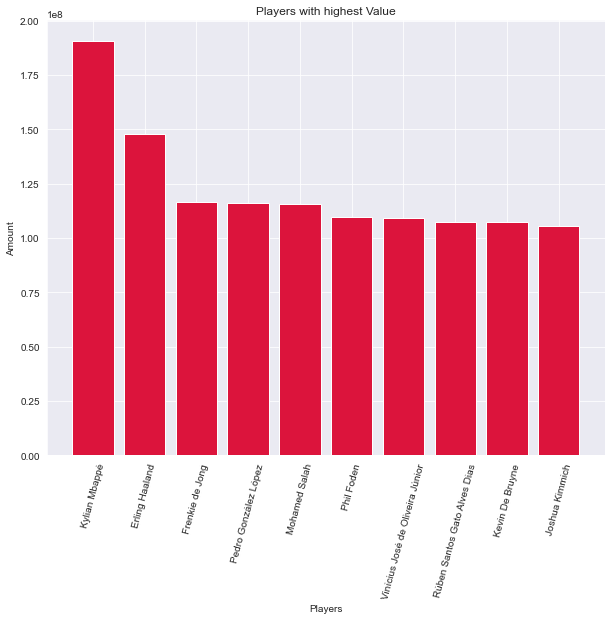

In [28]:
plt.figure(figsize = (10, 8));

plt.bar(players_value_high.FullName, players_value_high.ValueEUR, color = "crimson")

plt.xlabel("Players")
plt.ylabel("Amount")
plt.title("Players with highest Value")
plt.xticks(rotation = 75);


In [29]:
#Players with highest Release Clause

players_rc = players_value.sort_values("ReleaseClause", ascending = False).head(10)
players_rc

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
4,Kylian Mbappé,23,France,91,95,Paris Saint-Germain,190500000,366700000,230000,France
21,Erling Haaland,21,Norway,88,94,Manchester City,148000000,303400000,220000,Norway
82,Pedro González López,19,Spain,85,93,FC Barcelona,116000000,261000000,115000,Spain
42,Frenkie de Jong,25,Netherlands,87,92,FC Barcelona,116500000,247600000,230000,Netherlands
63,Vinícius José de Oliveira Júnior,21,Brazil,86,92,Real Madrid CF,109000000,245300000,200000,Not in team
83,Phil Foden,22,England,85,92,Manchester City,109500000,224500000,180000,England
5,Mohamed Salah,30,Egypt,90,90,Liverpool,115500000,213700000,270000,Not in team
20,Rúben Santos Gato Alves Dias,25,Portugal,88,91,Manchester City,107500000,206900000,230000,Portugal
10,Harry Kane,28,England,89,89,Tottenham Hotspur,105500000,200500000,240000,England
22,Gianluigi Donnarumma,23,Italy,88,92,Paris Saint-Germain,103500000,199200000,110000,Italy


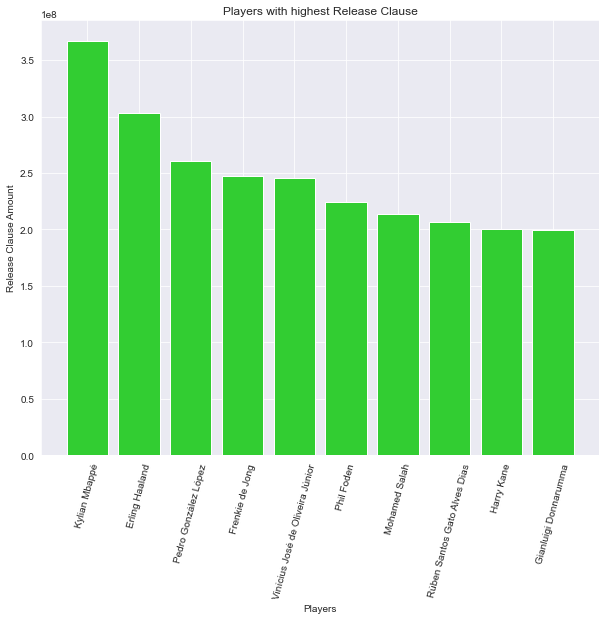

In [30]:
plt.figure(figsize = (10, 8))

plt.bar(players_rc.FullName, players_rc.ReleaseClause, color = "limegreen")
plt.xlabel("Players")
plt.ylabel("Release Clause Amount")
plt.title("Players with highest Release Clause")
plt.xticks(rotation = 75);

In [31]:
# Players with highest wage

players_wage = players_value.sort_values("WageEUR", ascending = False).head(10)
players_wage

,FullName,Age,Nationality,Overall,Potential,Club,ValueEUR,ReleaseClause,WageEUR,NationalTeam
1,Karim Benzema,34,France,91,91,Real Madrid CF,64000000,131199999,450000,France
2,Robert Lewandowski,33,Poland,91,91,FC Barcelona,84000000,172200000,420000,Poland
3,Kevin De Bruyne,31,Belgium,91,91,Manchester City,107500000,198900000,350000,Belgium
28,Toni Kroos,32,Germany,88,88,Real Madrid CF,72000000,147600000,310000,Not in team
5,Mohamed Salah,30,Egypt,90,90,Liverpool,115500000,213700000,270000,Not in team
23,Bernardo Mota Carvalho e Silva,27,Portugal,88,88,Manchester City,97500000,180400000,260000,Portugal
30,Antonio Rüdiger,29,Germany,87,88,Real Madrid CF,73500000,156200000,250000,Germany
24,João Pedro Cavaco Cancelo,28,Portugal,88,88,Manchester City,82500000,152600000,250000,Portugal
6,Thibaut Courtois,30,Belgium,90,91,Real Madrid CF,90000000,191300000,250000,Belgium
12,Heung Min Son,29,Korea Republic,89,89,Tottenham Hotspur,101000000,191900000,240000,Not in team


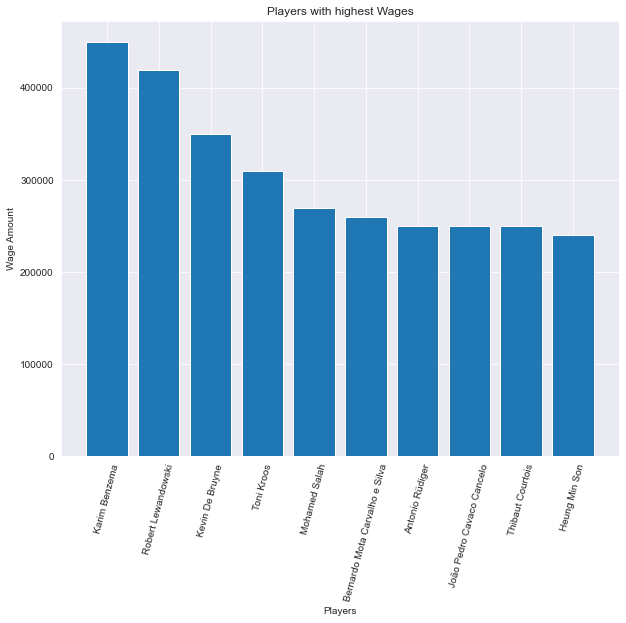

In [32]:
# Plotting the bar chart for players with highest wages

plt.figure(figsize = (10, 8))
plt.bar(players_wage.FullName, players_wage.WageEUR)
plt.xlabel("Players")
plt.ylabel("Wage Amount")
plt.title("Players with highest Wages")
plt.xticks(rotation = 75);

- Big names, Ronaldo and Messi, are missing from the list. Well, let's accept the truth! Benzema, Lewandowski, and De Bruyne are the top three highest-paid players in football at the moment

## Analysing players' attributes

In [33]:
attributes = fifa[['FullName', 'Age','Nationality', 'Club','ClubPosition','Overall','Potential','PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']]
attributes

,FullName,Age,Nationality,Club,ClubPosition,Overall,Potential,PaceTotal,ShootingTotal,PassingTotal,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,Lionel Messi,35,Argentina,Paris Saint-Germain,RW,91,91,81,89,90,...,91,44,40,93,94,75,96,20,35,24
1,Karim Benzema,34,France,Real Madrid CF,CF,91,91,80,88,83,...,80,63,39,92,89,84,90,43,24,18
2,Robert Lewandowski,33,Poland,FC Barcelona,ST,91,91,75,91,79,...,84,81,49,94,81,90,88,35,42,19
3,Kevin De Bruyne,31,Belgium,Manchester City,CM,91,91,74,88,93,...,91,75,66,88,94,83,89,68,65,53
4,Kylian Mbappé,23,France,Paris Saint-Germain,ST,91,95,97,89,80,...,82,64,38,92,83,80,88,26,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,21,Republic of Ireland,Sligo Rovers,RES,47,56,68,48,43,...,46,37,22,50,52,40,47,39,29,27
18535,Dejiang Yang,17,China PR,Guangzhou FC,SUB,47,57,55,37,41,...,35,52,46,35,40,33,45,46,50,52
18536,Liam Mullan,18,Northern Ireland,Derry City,SUB,47,67,64,40,49,...,36,39,24,42,50,43,59,39,37,48
18537,Daithí McCallion,17,Republic of Ireland,Derry City,SUB,47,61,52,24,25,...,18,42,54,23,32,37,41,50,54,54


### Players with highest pace

I enjoy watching players with pace. As, I am a Manchester United fan, I always savor moments when Rashford, Martial, Anthony, or Sancho penetrates through the defense. However, on the other hand, I also get irritated by them losing the ball on the run. I always believe, only pace does not help. It needs to be associated with three other important skills:
- Ball Control skills
- Dribbling skills and
- Composure

Let's find out the top players with an amalgamation of these attributes

In [34]:
attributes.query('PaceTotal > 85 and BallControl > 85 and Dribbling > 85 and Composure > 85')

,FullName,Age,Nationality,Club,ClubPosition,Overall,Potential,PaceTotal,ShootingTotal,PassingTotal,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
4,Kylian Mbappé,23,France,Paris Saint-Germain,ST,91,95,97,89,80,...,82,64,38,92,83,80,88,26,34,32
5,Mohamed Salah,30,Egypt,Liverpool,RW,90,90,90,89,82,...,85,63,55,92,85,86,92,38,43,41
11,Neymar da Silva Santos Jr.,30,Brazil,Paris Saint-Germain,LW,89,89,87,83,85,...,81,63,37,86,89,91,93,35,32,29


A bit disappointed by not seeing Man Utd players on the list. No doubt Mbappe is a competing in every category. This boy is simply amazing! An interesting fact is that he is the only player below the age 25 years. Salah and Neymar, both playing at 30, still maintain their attacking capabilities and are always ready to punish the defense on the opposite side

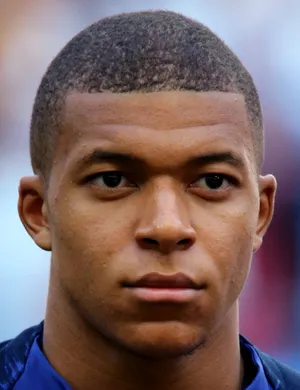



If we only consider only pace, Vinicus Junior, Theo Hernández, Federico Chiesa, Rafael da Conceição Leão and Alphonso Davies are the top players destroying defences with their pace. 

# MBAPPE VS HAALAND

We have just looked into the pace category. Mbappe appears to be everywhere. But don't forget Haaland! The way he has started this season with Manchester City under Pep Guardiola, all the records look breakable. Who do you think is the best player at the moment? Hold your thoughts and let's find out. 

We will divide the attributes into different categories and plot them on a radar chart(a common plot for showing football attributes). To avoid repeating code for every category, I will create a function that will directly plot attributes on the radar chart. So without wasting any time, let's head to it. 

PS. You can use this function (compare_players) to compare any two players base on any attributes in the dataset

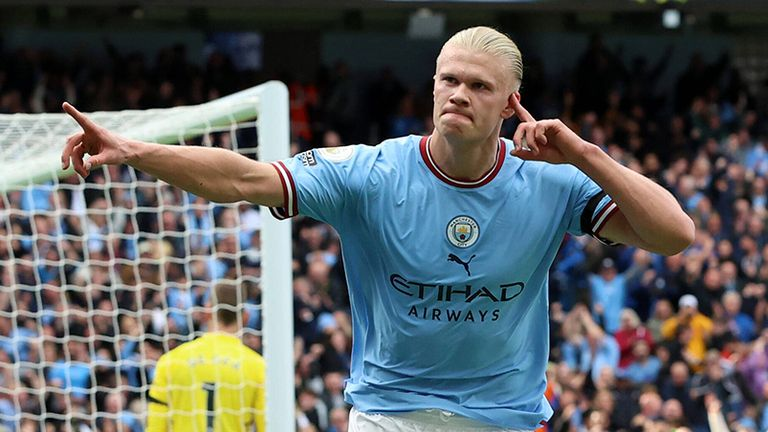 
(Source and credit: Skysports)

Since we have many attributes to compare, let's not look at them in one go. For better clarity, I will divide these attributes in following catergories. Please note that the division is subjetive, you may want to fill particular attribute in different category. You are welcome to do so. That is not the point here. Our ultimate aim is to compare attributes.

#### Ability in front of goal:
- In this category, I will focus on attributes that make a player clinical in front of the goal. Many players get a clear chance in front of the goal but not all of them make it count. I have selected the following attributes for this category:
  
  'Finishing', 'ShotPower', 'Penalties', 'HeadingAccuracy', 'Volleys', 'Curve', 'Composure', 'LongShots', 'Positioning'
  
#### Passing ability: 
- Selfishness does not help in football. Passing the ball is also equally important. Quantity and quality of passes directly define the creation of chances. I have selected the following attributes for this category:
    
  'Crossing', 'ShortPassing', 'LongPassing', 'Dribbling', 'Curve', 'BallControl', 'Vision'
  
#### Physical abilities:
- Football is a game of 90min. The Player runs 10.14 km per game on average(source:https://sqaf.club/how-far-do-football-players-run-in-a-game/). So physical attributes become a lot important to perform on a uniform level throughout the game. Physical attributes for this category are:

  'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength', 'Aggression'
  
#### Ball Recovering abilities:
- A football game cannot be won only with the attack. The defense should also be equally strong. It is always said that the best football teams know how to play not only with the ball but without the ball also. Hence, players' ball recovering capability plays an important role here. Selected attributes are:

  'Marking', 'Reactions', 'StandingTackle', 'SlidingTackle', 'Interceptions'


In [35]:
player1 = "Kylian Mbappé"
player2 = "Erling Haaland"

attribute_list = ['Finishing', 'ShotPower', 'Penalties','HeadingAccuracy', 'Volleys', 
                  'Curve', 'Composure', 'LongShots', 'Positioning']

def compare_players(player1, player2, attribute_list):
    """the function return the radar chart showing attributes in attribute list"""
    
    # Subsetting player1 and player2 from fifa(main dataset)
    subset_players = fifa[(fifa["FullName"] == player1) | (fifa["FullName"]==player2)]
    
    # Subsetting selected attributes from new created "subset_player" dataframe
    subset_compare_attribute = subset_players[attribute_list]
    
    # Coverting wide dataframe to long dataframe and selecting series for "Rating" column
    subset_compare_attribute_long = subset_compare_attribute.melt(var_name = "Attribute", 
                                                                  value_name = "Rating").Rating
    
    
    # Converting "Rating" series to list of rating values for each player
    player11 = [] 
    for i in range(0,2 * len(attribute_list)): 
        if (i %2 == 0): 
            player11.append(subset_compare_attribute_long[i]) 


    player22 = []
    for i in range(0,2 * len(attribute_list)): 
        if (i %2 == 1): 
            player22.append(subset_compare_attribute_long[i]) 
    
    
    # Appending first element of player 1 and player 2 at the end to their respective lists also doing same for attr list
    player11 = np.concatenate((player11, [player11[0]]))
    player22 = np.concatenate((player22, [player22[0]]))
    attribute_list_new = np.concatenate((attribute_list, [attribute_list[0]]))
    
    # Creating attribute labels on the radar chart
    att_labels = np.linspace(start = 0, stop = 2*np.pi, num = len(player11))
    
    # Creating Radar plot
    plt.figure(figsize = (8, 8))
    plt.subplot(polar = True)
    plt.plot(att_labels, player11)
    plt.plot(att_labels, player22)  
    lines, labels = plt.thetagrids(np.degrees(att_labels), labels = attribute_list_new)
    plt.title("Player Attributes", y = 1.1, fontdict = {"fontsize" : 20})
    plt.legend(labels = [player1, player2], loc= (0.95, 0.8));
    
    return




#### ABILITY IN FRONT OF GOAL

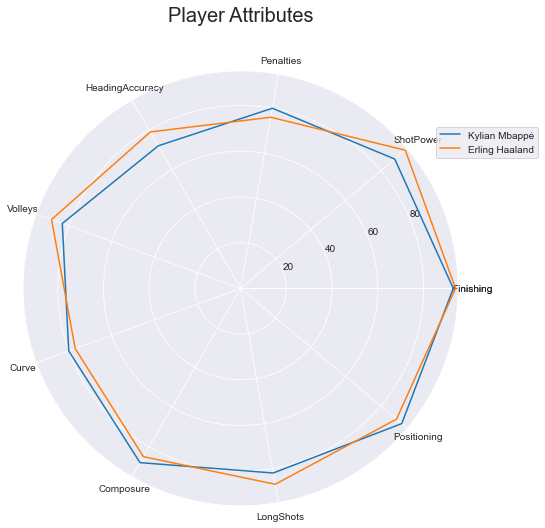

In [36]:
player1 = "Kylian Mbappé"
player2 = "Erling Haaland"

attribute_list = ['Finishing', 'ShotPower', 'Penalties','HeadingAccuracy', 'Volleys', 
                  'Curve', 'Composure', 'LongShots', 'Positioning']

compare_players(player1,player2,attribute_list)  

- Mbappe and Haaland are going head-to-head in their attacking abilities. Haaland edged over Mbappe in Shot Power, Heading accuracy, and Long Shots. Haaland's height might be the reason for higher heading accuracy however, we need to analyze more the data to confirm it.

#### PASSING ABILITY

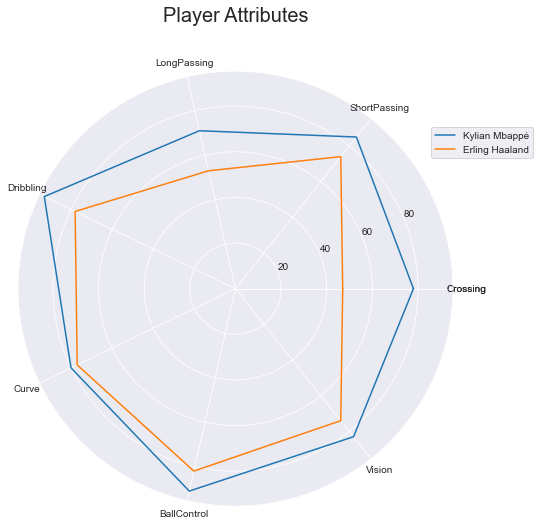

In [37]:
player1 = "Kylian Mbappé"
player2 = "Erling Haaland"

attribute_list = ['Crossing', 'ShortPassing', 'LongPassing', 'Dribbling', 'Curve', 'BallControl', 'Vision']

compare_players(player1,player2,attribute_list) 

Mbappe has clear domination in the passing category. We can see there is a significant difference in crossing abilities. Haaland's crossing attribute is almost 43% less than Mbappe's. Whereas, in terms of curve ability, the attribute shows a marginal gap

#### PHYSICAL ATTRIBUTES

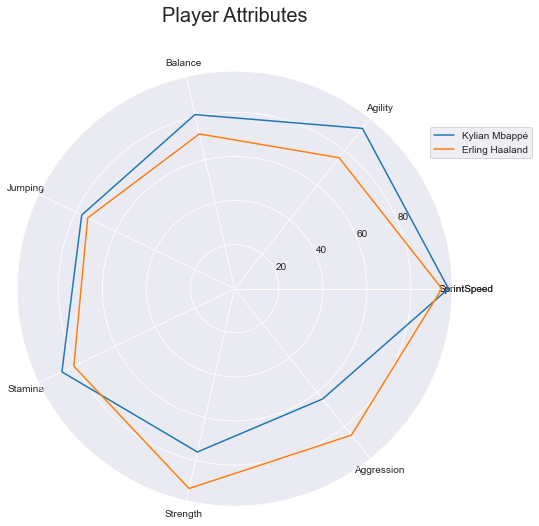

In [38]:
player1 = "Kylian Mbappé"
player2 = "Erling Haaland"

attribute_list = ['SprintSpeed', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength', 'Aggression']

compare_players(player1,player2,attribute_list) 

Both heptagons look similar in shape. However, it leaned toward strength and aggression for Haaland. On the other hand, Mbappe possesses more balance and agility

#### BALL RECOVERY

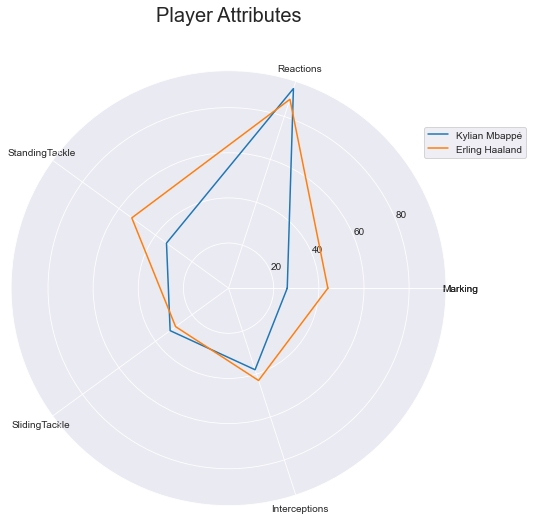

In [39]:
player1 = "Kylian Mbappé"
player2 = "Erling Haaland"

attribute_list = ['Marking', 'Reactions', 'StandingTackle', 'SlidingTackle', 'Interceptions']

compare_players(player1,player2,attribute_list)

Haaland is a better player in terms of marking, interceptions, and standing tackles. Whereas he lags behind Mbappe with regard to Sliding tackle and reaction. As this gap is so tight, we can say that Haaland has a better defensive work rate that Mbappe.

#### OVERALL

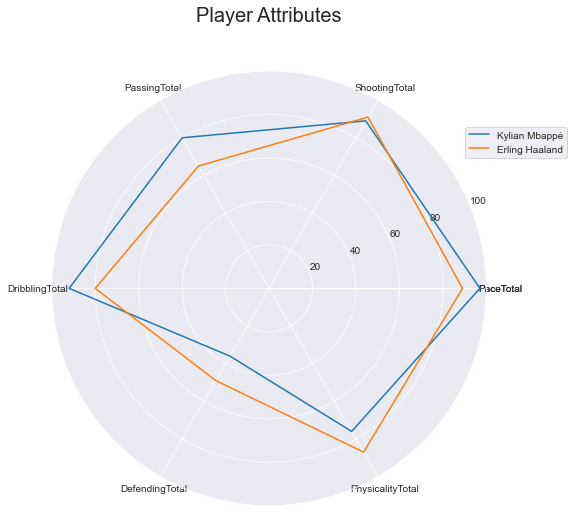

In [40]:
player1 = "Kylian Mbappé"
player2 = "Erling Haaland"

attribute_list = ['PaceTotal','ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal','PhysicalityTotal']

compare_players(player1,player2,attribute_list)

Finally, we understand that Haaland is a player with more physical attributes. Conversely, Mbappe is leading in agility. While both show almost equal Shooting qualities, Mbappe clearly has an edge over Haaland in terms of passing, dribbling, and pace qualities which makes him a better player than Haaland at the moment. 

# Summary

As a preparation step, we have had a look at the data set. The dataset has 5 columns with missing values. however, we left them as is, since we did not consider these columns in our analysis. We have only dealt with columns with numerical values. We also noticed that there were 2 columns with duplicate values.

The first part of the project was focused on analyzing data based on players' age, value, release clause, wage, and overall and potential ratings. The main takeaways from this section are:
#### Age:
- Buffon, 44 years old,  is the eldest player at the moment. 
- 31 players are playing at the age of 16 but none of them is currently representing the country on the international level
- Majority of the players in Fifa are in the range of 19-33 years group
- Haaland, Vinicius, Foden, de Ligt, and Pedri are the youngest players (less than 22 years) with the highest overall ratings
- On the international level, the USA has the youngest team with an average age of 24 years. On the contrary, Arsenal has the youngest team among the big club with also an average age of 24 years

#### Value, Release clause and Wage:
- Mbappe is the most valued player with a value of 190.5 million Euros.
- Karim Benzema is earning 450K per week which makes him highest paid player at the moment

### Mbappe vs Haaland
- Attributes show that Mbappe's strength is agility whereas Haaland's strength is physicality. While both are regarded as the top talents of the new generation, the radar plot implies that Mbappe has a slight edge over Haaland.

However, football results are determined by circumstances and how a player reacts to them. So, numbers on paper hardly direct us on how players approach the game in reality. So let the football matches decide who is the best!

# Future Work

The project was only focused on comparing Mbappe and Haaland at the end. However, there are other top talents in football. So the project work can also be extended to determine who is the best player overall. I have created a function that can be useful to compare any two players based on any attributes

# Credits

- Dataset : @ Alex (https://www.kaggle.com/datasets/cashncarry/fifa-23-complete-player-dataset)
- Fifa world cup picture = @ sporting news
- Mbapped picture: @ transfermarkt
- Haaland picture: @ Skysports